In [1]:
# prompt: #콘크리트유토피아
print("콘크리트유토피아_오리지날")

콘크리트유토피아_오리지날


In [2]:
from glob import glob
import os
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls '/content/drive/MyDrive/Colab Notebooks/samples_0518/'

ls: cannot access '/content/drive/MyDrive/Colab Notebooks/samples_0518/': No such file or directory


In [5]:
#`1!cp '/content/drive/MyDrive/Colab Notebooks/samples_0518/concrete_image_cjk.zip' './src_cjk'

In [7]:
# 이미지 폴더 있는지 확인
if not os.path.exists('src_cjk'):
    os.mkdir('src_cjk')

#concrete_image.zip 압축풀기 : 4분 소요
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/콘크리트_240904_고수클래스연계/concrete_image_cjk.zip', 'r') as zip_ref:
    zip_ref.extractall('src_cjk')

In [8]:
train = '/content/src_cjk/src_cjk'
print(len(os.listdir(train)))
test = '/content/src_cjk/test_cjk'
print(len(os.listdir(test)))

39800
200


In [ ]:
# AI PRO 업로드한 concrete_image.zip 파일 확인
#glob('concrete_image.zip')

In [9]:
!pwd

/content


In [10]:
#(1) IMAGE/Negative 와 IMAGE/Positive에 파일 분류해서 넣기
import shutil

# 이미지 폴더 있는지 확인
if not os.path.exists('IMAGE'):
    os.mkdir('IMAGE')
if not os.path.exists('IMAGE/Negative'):
    os.mkdir('IMAGE/Negative')
if not os.path.exists('IMAGE/Positive'):
    os.mkdir('IMAGE/Positive')

count=0
for filename in os.listdir(train):
    if filename.endswith('.jpg'):
        #count+=1
        #new_filename = f'img_{filename[:-4]}_negative.jpg'
        label=filename.split("_")[-1].split(".")[0]
        #formatted_number = "{:05d}".format(count)
        #new_filename = f'img_{formatted_number}_{label}.jpg'
        #print(label)
        if(label=="negative"):
          shutil.copy(os.path.join("/content/src_cjk/src_cjk", filename), os.path.join("IMAGE/Negative", filename))
        elif(label=="positive"):
          shutil.copy(os.path.join("/content/src_cjk/src_cjk", filename), os.path.join("IMAGE/Positive", filename))


        #shutil.copy(os.path.join(src_folder, filename), os.path.join(src_target, new_filename))

In [11]:
'''
# 이미지 폴더 있는지 확인
if not os.path.exists('IMAGE'):
    os.mkdir('IMAGE')ㄴㄴ

    # concrete_image.zip 압축풀기 : 4분 소요
    import zipfile
    with zipfile.ZipFile('concrete_image.zip', 'r') as zip_ref:
        zip_ref.extractall('IMAGE')
'''

"\n# 이미지 폴더 있는지 확인\nif not os.path.exists('IMAGE'):\n    os.mkdir('IMAGE')ㄴㄴ\n\n    # concrete_image.zip 압축풀기 : 4분 소요\n    import zipfile\n    with zipfile.ZipFile('concrete_image.zip', 'r') as zip_ref:\n        zip_ref.extractall('IMAGE')\n"

In [12]:
# concrete_image Negative 폴더 안의 이지미 갯수
!ls -l ./IMAGE/Negative/ | grep jpg | wc -l

19900


In [13]:
!ls -l ./IMAGE/Positive/ | grep jpg | wc -l

19900


In [14]:
#3.. 이미지 파일 하나 읽어 이미지 보기

In [15]:
#path = './IMAGE/Negative/00001_.jpg'
#path = 'IMAGE/Negative/'+os.listdir('IMAGE/Negative/')[1]
path = 'IMAGE/Positive/'+os.listdir('IMAGE/Positive/')[1]
print(path)

IMAGE/Positive/img_01320_positive.jpg


In [16]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile, dtype=tf.float32)
print(image.shape)

(227, 227, 3)


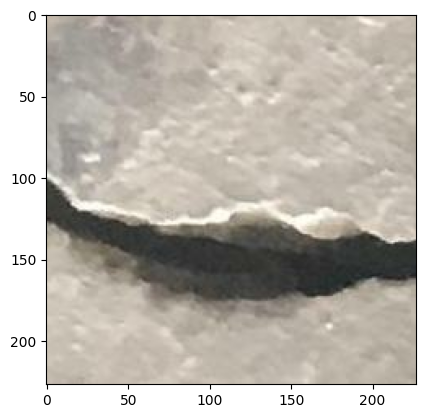

In [17]:
plt.imshow(image)
plt.show()

In [18]:
# Hyperparameter Tunning

num_epochs = 10
#num_epochs = 2
batch_size = 32

learning_rate = 0.001
dropout_rate = 0.5

input_shape = (224, 224, 3)  # 사이즈 확인
num_classes = 2    # Postive , Negative

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
#ImageDataGenerator 와 flow_from_directory 기능
#mageDataGenerator : 이미지 데이터에 대해 scaling, augmentation, validation_split 전처리 기능 수행
#flow_from_directory : 실제 이미지 데이터 읽고 배치, 셔플하고 labeling 수행

In [21]:
# ImageDataGenerator 이용하여 이미지 전처리하기
# 1개 IMAGE 폴더로 Train, Test dataset으로 나누어야 되므로 validation_split 사용해야 함
# 여기서는 data augmentation 하지 않음 : 주석처리 했으며 필요하면 주석해체하여 사용하면 됨
# validation 데이터 사이즈 입력 : validation_split=0.2 --> 20%
# (주의점) MobileNetV2에 인풋으로 사용하기 전에 전 처리하는 코드가 preprocess_input으로 함수화 되어 있습니다. 따라서 그대로 사용하시면 됩니다.
# 그래서 rescale 수행하지 않음

image_datagen = ImageDataGenerator(
      #rescale=1. / 255,        # MobileNetV2 경우, 아래 preprocess_input 호출해서 리스케일 하므로 커멘트 처리함
      validation_split=0.2,     # train set : valid set = 8 : 2
      preprocessing_function = preprocess_input  # MobileNetV2 사용한다면 전처리 코드를 넣어 주면 됩니다.
#       rotation_range=30,
#       width_shift_range=0.1,
#       height_shift_range=0.1,
#       shear_range=0.1,
#       zoom_range=0.1,
#       horizontal_flip=True,
#       fill_mode='nearest'
    )

In [22]:
# 이미지 폴더 내의 데이터  읽고 배치 , 셔플하고 labeling 수행
# 실제로 1개 IMAGE 폴더에서 Train 32000건, Test 8000건 dataset 만듬
# 2개 Class에 대한 라벨링(라벨인코딩,원핫인코딩) 수행
# MobileNetV2은 [96, 128, 160, 192, 224] 사이즈만 지원하므로 flow_from_directory 함수에서 사이즈 변경함
# subset = 'training' --> training_generator 생성
# subset = 'validation' --> test_generator 생성

# IMAGE 폴더 밑에 .ipynb_checkpoints 폴더 있을경우 폴데 삭제
#!rm -rf ./IMAGE/.ipynb_checkpoints

training_generator = image_datagen.flow_from_directory(
    './IMAGE',
    batch_size=batch_size,
    target_size=(224, 224),       # 원하는 출력 사이즈 입력. MobileNetV2 위해 사이즈 변경 : 227,227 --> 224,224. 최종 출력 : (224,224,3)
    class_mode = 'categorical',   # binary , categorical
    #class_mode = 'binary',   # binary , categorical  좀 이상항
    shuffle = True,
    subset = 'training'           # training, validation. ImageDataGenerator의 validation_split 사용하므로 subset 지정
    )

test_generator = image_datagen.flow_from_directory(
    './IMAGE',
    batch_size=batch_size,
    target_size=(224, 224),       # 원하는 출력 사이즈 입력. MobileNetV2 위해 사이즈 변경 : 227,227 --> 224,224. 최종 출력 : (224,224,3)
    class_mode = 'categorical',   # binary , categorical
    shuffle = True,
    subset = 'validation'         # training, validation. ImageDataGenerator의 validation_split 사용하므로 subset 지정
    )

Found 31840 images belonging to 2 classes.
Found 7960 images belonging to 2 classes.


In [23]:
# class 이름 및 번호 매핑 확인
print(training_generator.class_indices)

{'Negative': 0, 'Positive': 1}


True Value :  [0. 1.]
(224, 224, 3)


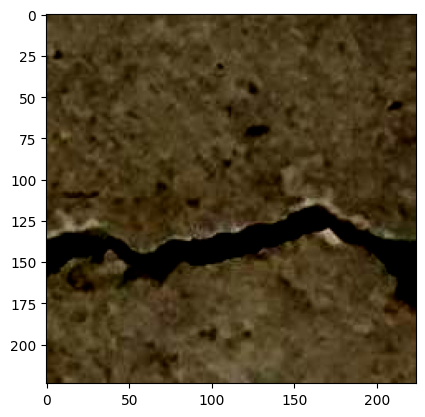

In [28]:
batch_samples = next(iter(training_generator)) #32개씩 가지고 옴

print('True Value : ',batch_samples[1][0]) #batch_samples[1] 은 label 리스트
print(batch_samples[0][0].shape)           #batch_samples[0] 은 이미지 list
plt.imshow(batch_samples[0][0])
plt.show()

In [25]:
batch_samples[1][0]

array([1., 0.], dtype=float32)

In [27]:
for a, b in training_generator:  #진짜 여기는 원핫이네.. 그러면 catergorical이 맞겠네.. 배치사이즈만큼 자른다.32개
  print(a.shape) #
  print(b.shape) #
  print(a[0][0][0])
  break

for c in training_generator:  #진짜 여기는 원핫이네.. 그러면 catergorical이 맞겠네..
  print(c[0].shape) # training_generator의 값이 계속 바뀌는 이유는 break를 걸어서..index가 바뀐때문..
  print(c[0][0][0][0])
  print(c[1].shape) # C는 튜블ㅇㅁ 위랑 같은 결과임..  c[0]은 batch image [[[R,G,B]X224X224]]...임
  break


(32, 224, 224, 3)
(32, 2)
[0.30196083 0.28627455 0.2941177 ]
(32, 224, 224, 3)
[0.5686275  0.5058824  0.41960788]
(32, 2)


In [29]:
# 시험환경 준비하기..
#정답지 pandas만들고 csv로 만들기
import pandas as pd
target=[]
label=[]
result=[]
for item in os.listdir("src_cjk/test_cjk"):
  target.append(item.split(".")[0])
  if(item.split("_")[-1].split(".")[0]=="negative"):
    label.append([0.,1.])
  else:
    label.append([1.,0.])
  result.append("")

df = pd.DataFrame({"target":target, "label":label, "result":result})

In [30]:
df.head()

,target,label,result
0,img_00142_negative,"[0.0, 1.0]",
1,img_00102_positive,"[1.0, 0.0]",
2,img_00127_negative,"[0.0, 1.0]",
3,img_00197_negative,"[0.0, 1.0]",
4,img_00167_negative,"[0.0, 1.0]",


In [31]:
df.to_csv("test.csv")

In [32]:
# 사전 훈련된 모델 MobileNet V2에서 기본 모델을 생성합니다.
# 아래와 같은 형식을 Transfer Learning 사용하며 됩니다. 우리는 그냥 불러다 사용할줄 알면 됩니다.

base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [33]:
len(base_model.layers)

154

In [34]:
# MobileNet V2 베이스 모델 고정하기
base_model.trainable = False

In [35]:
# 모델 구축

x = base_model.output #최종 출력이
'''
 out_relu (ReLU)             (None, 7, 7, 1280)           0         ['Conv_1_bn[0][0]']

 global_average_pooling2d (  (None, 1280)                 0         ['out_relu[0][0]']
 GlobalAveragePooling2D)

 dense (Dense)               (None, 2)                    2562      ['global_average_pooling2d[0][
                                                                    0]']
'''
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # 3차원(7, 7, 1280) --> 1차원(1280)으로 줄이기
output = tf.keras.layers.Dense(2, activation='softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=output)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [36]:
# 모델 컴파일
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),  # Optimization
              loss='categorical_crossentropy',  # Loss Function
              metrics=['accuracy'])             # Metrics / Accuracy

In [39]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)

# ModelCheckpoint
checkpoint_path = "my_checkpoint.ckpt.weights.h5"
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=1)
# ReduceLROnPlateau
lrReducer = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.0001)

In [ ]:
# ImageDataGenerator 와 flow_from_directory 이용하여 DataSet을 만들었으며
# num_epochs = 10
# batch_size = 32
# (참고) steps_per_epoch , validation_steps 하이퍼 파라미터 쓰지 말자 --> 에러 자주 발생. batch_size 사용하자

history = model.fit(
    training_generator,
    validation_data = test_generator,
    epochs=num_epochs,
    # steps_per_epoch = len(training_generator) // batch_size,  # 32 is the batch_size
    # validation_steps = len(test_generator) // batch_size,
    batch_size = batch_size,
    callbacks=[es, checkpoint, lrReducer]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


669/995 ━━━━━━━━━━━━━━━━━━━━ 7:49 1s/step - accuracy: 0.9633 - loss: 0.0760

In [ ]:
model_name='01095962580_3.h5'

In [ ]:
#학습이 끝난 모델 저장하기
#model.save('my_checkpoint.ckpt')
model.save(model_name)


In [ ]:
# 저장된 모델 불러오기
#loaded_model = tf.keras.models.load_model('my_checkpoint.ckpt')
loaded_model = tf.keras.models.load_model(model_name)

In [ ]:
#구글드라이브에 저장
shutil.copytree('/content/'+model_name, '/content/drive/MyDrive/Colab Notebooks/콘크리트_240904_고수클래스연계/'+model_name)

'/content/drive/MyDrive/Colab Notebooks/samples_0518/concrete_10012140_240526.ckpt'

Found 8000 images belonging to 2 classes.


In [ ]:
'''
name = ['박영철', '심영미', '황주원']
phone = ['042-400-9479', '016-335-6830', '062-642-3039']
mail = ['ygim@hotmail.com','gimsujin@baghan.kr','jiweongu@gimi.com']

df = pd.DataFrame({"name":name, "phone":phone, "mail":mail})
'''

### 예측하기

In [ ]:
final=pd.read_csv("test.csv")

In [ ]:
final.head()

,Unnamed: 0,target,label,result
0,0,img_00130_negative,negative,NaN
1,1,img_00111_negative,negative,NaN
2,2,img_00191_positive,positive,NaN
3,3,img_00188_negative,negative,NaN
4,4,img_00129_positive,positive,NaN


In [ ]:
'''
#저장된 모델 불러서 사용하는 경우
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

from google.colab import drive
drive.mount('/content/drive')
'''

Mounted at /content/drive


In [ ]:
'''
model_name='concrete_10012140_240526.ckpt'
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/samples_0518/'+model_name)
'''

In [ ]:
result=[]
answer_class={0:'negative', 1:'positive'}
right=0
total=0
for image,label in zip(final['target'],final['label']):
  total+=1
  test_image_path="src_cjk/test_cjk/"+image+".jpg"
  img = load_img(test_image_path, target_size=(224, 224))  #전용 img 로더를 사용해야함.
  img_array = img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = preprocess_input(img_array)

  # 예측 수행
  predictions = loaded_model.predict(img_array)
  #print(predictions)
  # 예측 결과 해석

  predicted_class = np.argmax(predictions, axis=1)
  #print(predicted_class)
  confidence = np.max(predictions, axis=1)
  #print(confidence)

  # 클래스 인덱스를 클래스 이름으로 매핑
  #class_indices = training_generator.class_indices
  #class_names = {v: k for k, v in class_indices.items()}

  pred=answer_class[predicted_class[0]]

  '''
  print(image,label,end=":")
  print(pred,end="||")
  print(confidence)
  '''
  result.append(pred)
  #plt.imshow(img)
  #plt.show()

  if(label==pred):
    right+=1
  #break
print("점수는 :"+str(right/total*100)+"점")



1/1 [==============================] - 0s 64ms/step
점수는 :100.0점


In [ ]:
final['target'].tolist()

['img_00130_negative',
 'img_00111_negative',
 'img_00191_positive',
 'img_00188_negative',
 'img_00129_positive',
 'img_00199_positive',
 'img_00153_positive',
 'img_00165_positive',
 'img_00116_positive',
 'img_00155_positive',
 'img_00175_positive',
 'img_00186_negative',
 'img_00198_positive',
 'img_00106_negative',
 'img_00104_negative',
 'img_00123_positive',
 'img_00183_negative',
 'img_00183_positive',
 'img_00114_negative',
 'img_00181_positive',
 'img_00134_positive',
 'img_00157_negative',
 'img_00140_negative',
 'img_00109_negative',
 'img_00125_negative',
 'img_00119_positive',
 'img_00112_negative',
 'img_00170_positive',
 'img_00141_negative',
 'img_00168_negative',
 'img_00127_negative',
 'img_00149_negative',
 'img_00172_negative',
 'img_00154_negative',
 'img_00168_positive',
 'img_00163_positive',
 'img_00101_negative',
 'img_00136_positive',
 'img_00114_positive',
 'img_00192_negative',
 'img_00121_positive',
 'img_00128_negative',
 'img_00153_negative',
 'img_00188

In [ ]:
real_final=pd.DataFrame({"target":final['target'].tolist(), "label":final['label'].tolist(), "result":result})


In [ ]:
real_final

,target,label,result
0,img_00130_negative,negative,negative
1,img_00111_negative,negative,negative
2,img_00191_positive,positive,positive
3,img_00188_negative,negative,negative
4,img_00129_positive,positive,positive
...,...,...,...
195,img_00142_positive,positive,positive
196,img_00200_positive,positive,positive
197,img_00185_positive,positive,positive
198,img_00139_negative,negative,negative


In [ ]:
real_final.to_csv("real_final.csv")